In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
np.random.seed(42)
X = np.random.randn(500)  # 输入数据
# Y = 3.0 * X + np.random.randn(1000) * 2.0  # 带噪声的输出数据，斜率为3，噪声为2
Y = 3.0 * X + np.random.normal(0,2,500)

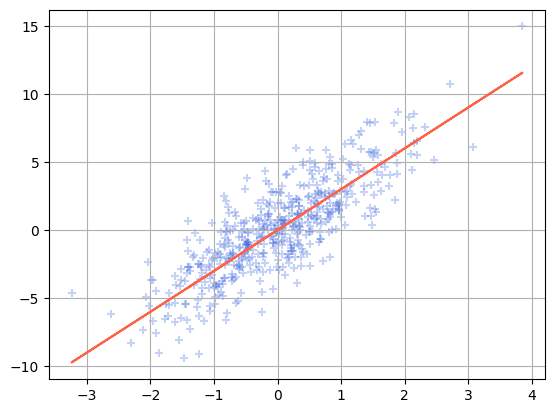

In [3]:
plt.scatter(X,Y,marker = "+",color = "royalblue",alpha = 0.3)
plt.plot(X,3*X,color = "tomato")
plt.grid()

In [4]:
def normal_dist(x,mu,sigma):
    return 1/(np.sqrt(2*np.pi) * sigma + 1e-6) * np.exp(-(x-mu)**2/(2 * sigma**2 + 1e-6))

In [5]:
def z_var_dist(z0,mu0,sigma0): #参数z的变分分布
    return normal_dist(z0,mu0,sigma0)

In [6]:
def para_grad(z,phi): #求变分概率密度对各个参数的梯度
    dg0_1 =  1/(phi[1]**2 + 1e-6) * (z[0] - phi[0])
    dg0_2 =  -1/(phi[1] + 1e-6)  + 1/(phi[1]**3+1e-6) *(z[0] - phi[0])**2
    return np.array([dg0_1,dg0_2])

In [7]:
def data_dist(d,z,phi):
    return normal_dist(d[1],d[0] * z[0], 2) 

In [8]:
def prior_dist(z0, mu0, sigma0):  # 先验分布 p(z)
    return normal_dist(z0, mu0, sigma0)

In [9]:
def ELBO_grad(d, z, phi):
    x_i, y_i = d
    log_py_given_z = np.log(normal_dist(y_i, x_i * z[0], 2) + 1e-10)
    log_pz = np.log(prior_dist(z[0],0, 20) + 1e-10)
    log_pz_total = log_py_given_z + log_pz
    log_q = np.log(z_var_dist(z[0], phi[0], phi[1]) + 1e-10)
    grad = para_grad(z, phi) * (log_pz_total - log_q)
    elbo = log_pz_total - log_q
    return grad, elbo

In [10]:
def train_epoch(X, Y, phi, lr=0.1):
    num = len(X)
    accu_grad = np.array([0.0, 0.0])
    accu_elbo = 0 
    
    for i in range(num):
        for j in range(100):
            rand_z0 = np.random.normal(phi[0], np.maximum(phi[1], 1e-3))  
            rand_z = np.array([rand_z0])
            dg, el =  ELBO_grad(np.array([X[i], Y[i]]), rand_z, phi)
            accu_grad += dg 
            accu_elbo += el
    
    
    phi[0] += accu_grad[0] * lr / num * 0.01  
    phi[1] = np.maximum(phi[1] + accu_grad[1] * lr / num * 0.01, 1e-3)  

    accu_elbo /= num
    accu_elbo *= 0.01
    return phi, accu_elbo


In [11]:
phi = np.array([0,1])  #参数z变分分布的参数

In [12]:
track = np.zeros((1000,2))
accel = np.zeros((1000,1))
track[0] = phi
for i in range(1,1000):
    track[i],accel[i] = train_epoch(X,Y,track[i-1])
    print(track[i],accel[i])

[0.06311347 1.08055271] [-5.64945287]
[0.12769846 1.14655035] [-5.55749876]
[0.1879082  1.20949726] [-5.46626828]
[0.24777132 1.26940007] [-5.39240128]
[0.30850702 1.31716203] [-5.32948152]
[0.36702743 1.36610388] [-5.26998216]
[0.42319719 1.40937898] [-5.20867202]
[0.47544021 1.45360079] [-5.14490884]
[0.53217067 1.48713832] [-5.1216566]
[0.58767756 1.52254002] [-5.0832852]
[0.63977574 1.55285475] [-5.02835252]
[0.6917133 1.5815465] [-5.00262592]
[0.74199336 1.60912244] [-4.97512848]
[0.78714236 1.6402209 ] [-4.92597136]
[0.83318605 1.66675641] [-4.89845583]
[0.87791603 1.68948202] [-4.8724259]
[0.92447217 1.71019149] [-4.85413648]
[0.96948694 1.72864505] [-4.83457089]
[1.01583695 1.74548701] [-4.81340637]
[1.05913969 1.76482661] [-4.7865668]
[1.09901884 1.78076103] [-4.75272123]
[1.14001361 1.79285582] [-4.74036793]
[1.17918004 1.80440766] [-4.72118898]
[1.21448422 1.82357291] [-4.69589912]
[1.25261448 1.83698572] [-4.68488874]
[1.29038576 1.84936572] [-4.67795793]
[1.32745548 1.8599

[2.80334305 2.07766701] [-4.36833764]
[2.80234442 2.08200987] [-4.36363041]
[2.80506583 2.08454106] [-4.3716411]
[2.8059255  2.08647295] [-4.37616468]
[2.80746448 2.08925429] [-4.37928655]
[2.80864776 2.08854058] [-4.36859244]
[2.80894018 2.09071671] [-4.3751447]
[2.80741473 2.09230722] [-4.37502637]
[2.80739885 2.09308858] [-4.36851035]
[2.80797239 2.09303264] [-4.37576566]
[2.8085436  2.09318545] [-4.37668929]
[2.80849781 2.09260114] [-4.37638803]
[2.80789865 2.09032918] [-4.38575876]
[2.80804063 2.09022097] [-4.37151995]
[2.8088096  2.08998303] [-4.38022595]
[2.80957009 2.09147879] [-4.37408635]
[2.80844349 2.08896857] [-4.3735107]
[2.8106051  2.08956191] [-4.37734539]
[2.80941906 2.09003822] [-4.36578775]
[2.80778484 2.09113074] [-4.37249092]
[2.808891 2.088041] [-4.37362242]
[2.80946523 2.08925701] [-4.37171128]
[2.8109328  2.09384001] [-4.3718627]
[2.81109137 2.09452835] [-4.36537671]
[2.8102034  2.09557004] [-4.37072416]
[2.81076516 2.09770862] [-4.37000576]
[2.80737342 2.097896

[2.82134868 2.0873043 ] [-4.37089965]
[2.82312629 2.08519194] [-4.37761446]
[2.82374079 2.08805748] [-4.37276068]
[2.8243307  2.08655353] [-4.37760032]
[2.82452506 2.08448132] [-4.37647169]
[2.82392783 2.08296727] [-4.37419355]
[2.82423386 2.08040679] [-4.38316413]
[2.82339609 2.08401165] [-4.37265962]
[2.82245418 2.0824597 ] [-4.38131501]
[2.82125155 2.08276211] [-4.36933115]
[2.81797509 2.08452202] [-4.37886063]
[2.81989838 2.08186749] [-4.36644972]
[2.82057444 2.08348257] [-4.37446414]
[2.82037383 2.08349097] [-4.37585268]
[2.81898006 2.08266848] [-4.37907116]
[2.81875963 2.08067255] [-4.37416515]
[2.81928108 2.08102109] [-4.36526737]
[2.82060009 2.0823662 ] [-4.36878936]
[2.82149189 2.07770059] [-4.38858217]
[2.82285707 2.07940926] [-4.37564242]
[2.82260997 2.08463594] [-4.35972231]
[2.82392331 2.0830484 ] [-4.37215723]
[2.8229272 2.0812   ] [-4.38048156]
[2.82124259 2.08138912] [-4.37452016]
[2.82015684 2.08501377] [-4.37754357]
[2.81982648 2.08450045] [-4.37786834]
[2.81994263 2.

KeyboardInterrupt: 

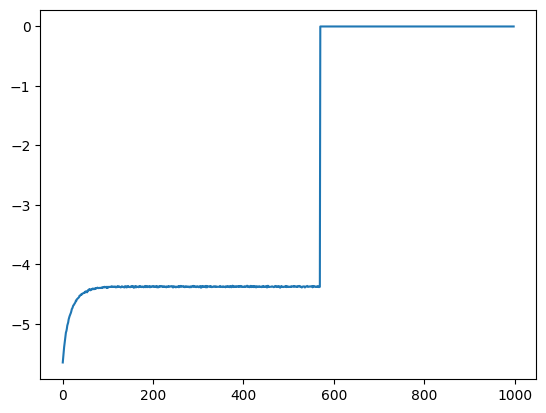

In [13]:
plt.plot(accel[1:1000])

In [ ]:
data = np.zeros((2000,2))
for i in range(2000):
    z0 = np.random.normal(2.97047601, 2.06)  
    x = np.random.randn()
    y = x * z0 + np.random.normal(0,2)
    data[i,0] = x 
    data[i,1] = y 

In [ ]:
plt.subplot(2,1,1)
plt.scatter(data[:,0],data[:,1],marker = "+",color = "forestgreen",alpha = 0.3)
plt.plot(X,3*X,color = "tomato")
plt.ylim([-20,20])
plt.xlim([-4,4])
plt.grid()
plt.subplot(2,1,2)
plt.scatter(X,Y,marker = "+",color = "royalblue",alpha = 0.3)
plt.plot(X,3*X,color = "tomato")
plt.ylim([-20,20])
plt.xlim([-4,4])
plt.grid()

In [21]:
def ELBO_grad_RP(d, z, phi):
    x_i, y_i = d
    log_py_given_z = np.log(normal_dist(y_i, x_i * z[0], 2) + 1e-10)
    log_pz = np.log(prior_dist(z[0],0, 20) + 1e-10)
    log_pz_total = log_py_given_z + log_pz
    log_q = np.log(z_var_dist(z[0], phi[0], phi[1]) + 1e-10)
    coef = x_i*(y_i - x_i*z[0])/(2**2) - z[0]/(20**2) - (phi[0] - z)/(phi[1]**2)
    epsilon = (z[0] - phi[0])/phi[1]
    grad = coef * np.array([1,epsilon])
    elbo = log_pz_total - log_q
    return grad, elbo

In [22]:
def train_epoch_RP(X, Y, phi, lr=0.1):
    num = len(X)
    accu_grad = np.array([0.0, 0.0])
    accu_elbo = 0 
    
    for i in range(num):
        for j in range(100):
            rand_z0 = np.random.normal(0,1)  
            rand_z = np.array([rand_z0* phi[1] + phi[0]])
            dg, el =  ELBO_grad_RP(np.array([X[i], Y[i]]), rand_z, phi)
            accu_grad += dg 
            accu_elbo += el
    
    
    phi[0] += accu_grad[0] * lr / num * 0.01  
    phi[1] = np.maximum(phi[1] + accu_grad[1] * lr / num * 0.01, 1e-3)  

    accu_elbo /= num
    accu_elbo *= 0.01
    return phi, accu_elbo

In [ ]:
track = np.zeros((1000,2))
accel = np.zeros((1000,1))
track[0] = phi
for i in range(1,1000):
    track[i],accel[i] = train_epoch_RP(X,Y,track[i-1])
    print(track[i],accel[i])

[0.06829028 1.07593995] [-5.65983671]
[0.13557903 1.14206675] [-5.56181761]
[0.20088381 1.20209907] [-5.46637807]
[0.26433213 1.25657352] [-5.38730017]
[0.32651714 1.30484665] [-5.32965919]
[0.38710304 1.35072633] [-5.2567942]
[0.44625516 1.39230456] [-5.20333507]
[0.50388873 1.43042676] [-5.15729021]
[0.56024529 1.46475608] [-5.12177852]
[0.61522673 1.4984022 ] [-5.06025688]
[0.66858157 1.52947575] [-5.02080974]
[0.72119688 1.5574112 ] [-4.99230695]
[0.7719806  1.58354517] [-4.95845448]
[0.82116828 1.60913585] [-4.91839509]
[0.86957868 1.63276609] [-4.88994435]
[0.91709287 1.65361907] [-4.87450355]
[0.96325753 1.67294699] [-4.85200875]
[1.00793898 1.69231485] [-4.81568693]
[1.0521334  1.70973843] [-4.79352572]
[1.09446566 1.72768208] [-4.75556934]
[1.13584873 1.74334536] [-4.75644696]
[1.17712248 1.75760404] [-4.74450897]
[1.21697158 1.77172559] [-4.71297037]
[1.25593909 1.78662809] [-4.68462783]
[1.29417788 1.79888123] [-4.6853455]
[1.33124605 1.81092239] [-4.66105746]
[1.36741218 1.